Pandas library was first developed by Wes McKinney in 2008 for data manipulation and analysis.

#### References:
    www.python.org
    www.numpy.org
    www.matplotlib.org
    https://pandas.pydata.org

#### Questions/feedback: petert@digipen.edu

# Chapter13 Distributions
- Continuous and Discrete distributions
- Uniform Distribution
- Normal Distribution
- Central tendency

### Import:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time                             # using this to pause plotting
from IPython import display             # using this to refresh/display plots in a loop
%matplotlib inline

### Discrete and Continuous Statistical Distributions

#### Statistical Distribution:
The distribution of a statistical data is a list or function displaying all the possible values (or intervals) of the data and their frequency to occur.

#### Discrete Distribution:
Statistical distribution where the probabilities of outcomes are finite values. (Finite number or discrete set of measurable values.)

Examples:
- Rolling a die {1, 2, 3, 4, 5, 6}
- Exam grades (F, ..., A+}
- Error categories {Critical, Normal, Low}
- Digits of Pi {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

#### Continuous Distribution:
Statistical distribution where the probabilities of outcomes potentially have infinite measurable values.

Examples:
- Spinning a spinner {continuous range between 0 and 360 degrees)
- Height of humans {continuous range between 0 and 9 feet}

Let's simulate rolling a die a number of times

In [2]:
np.random.randint?

Docstring:
randint(low, high=None, size=None, dtype=int)

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

.. note::
    New code should use the `~numpy.random.Generator.integers`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
low : int or array-like of ints
    Lowest (signed) integers to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int or array-like of ints, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
    If array-like, must contain integer values
size : int or tuple of ints, optional
    Outp

In [3]:
np.random.randint(1, 7, 6)

array([5, 5, 6, 6, 6, 3])

In [4]:
# generate a roll (a number between 1 and 6) 6 times
roll_6 = np.random.randint(1,7,6)   # the result is a numpy array with length 6
roll_6

array([3, 3, 1, 1, 2, 2])

In [5]:
np.arange(7) + .5

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

In [6]:
bins = np.arange(7) + 0.5

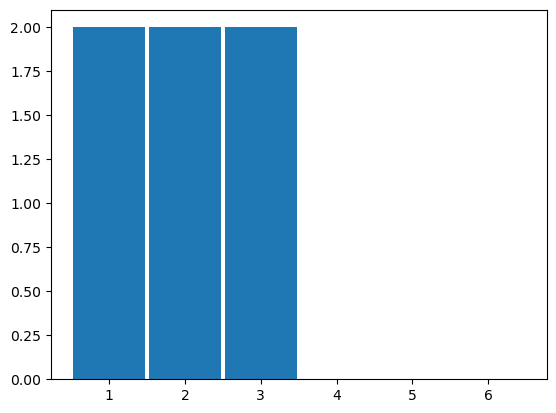

In [7]:
# plot the frequency of outcomes using a histogram
plt.hist(roll_6, bins=bins, rwidth=0.95)
plt.show()

So far no particular pattern is recognized

Lets increase the number of rolls:

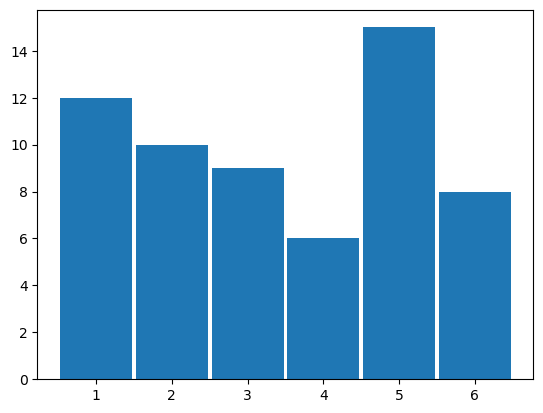

In [8]:
# 60 rolls
nrolls = 60
roll_60 = np.random.randint(1,7,nrolls)
plt.hist(roll_60, bins = bins, rwidth=0.95)
plt.show()

Increase to 600:

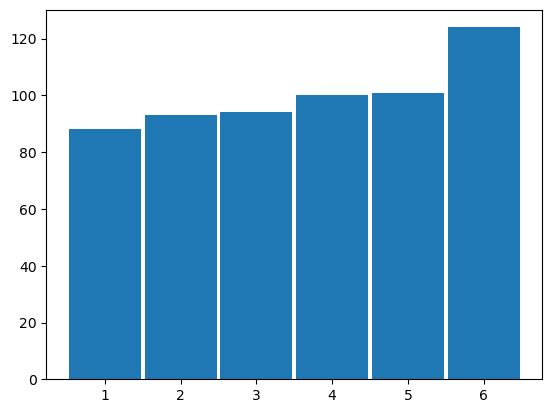

In [9]:
# 600 rolls
nrolls = 600
roll_600 = np.random.randint(1,7,nrolls)
plt.hist(roll_600, bins = bins, rwidth=0.95)
plt.show()

Increase to 6000:

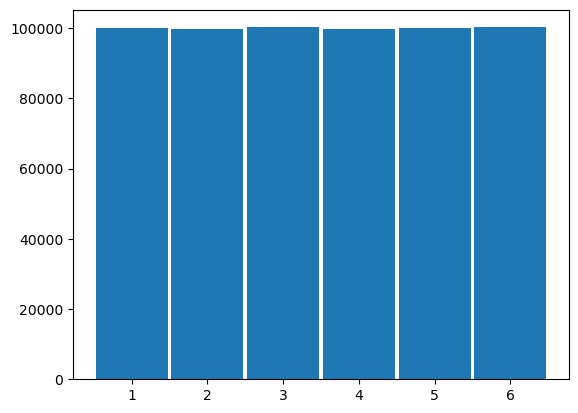

In [10]:
# 6000 rolls
nrolls = 600000
roll_6000 = np.random.randint(1,7,nrolls)
plt.hist(roll_6000, bins = bins, rwidth=0.95)
plt.show()

Note that all probabilities happen almost equally, about the same number of times.<br>
If all probabilities happen equally, we say that the probabilities are uniformly distributed.

Now display all in one plot and see how the uniformity shapes a rectangle when increasing the size of the data:

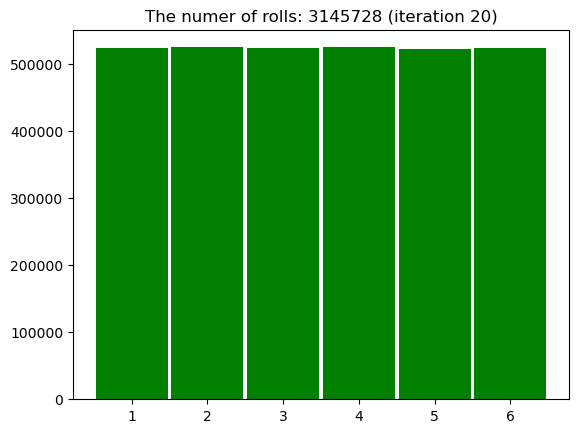

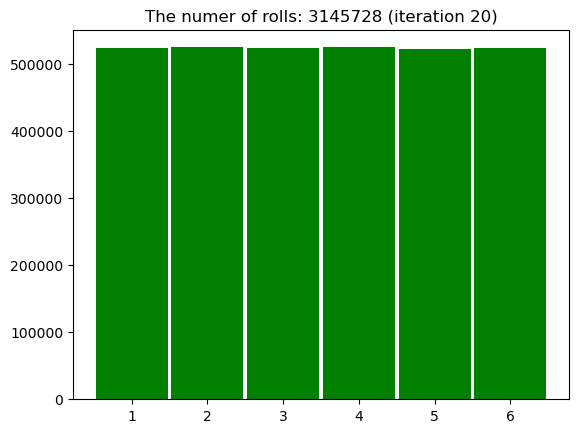

In [11]:
for i in range(20):
    nrolls = 6 * 2 ** i
    roll_6power = np.random.randint(1,7,nrolls)
    plt.hist(roll_6power, bins = bins, rwidth=0.95, color="Green")
    plt.title('The numer of rolls: ' + str(nrolls) + ' (iteration ' + str(i+1) + ')')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(2)

### Uniform Distribution

Formal definition: constant in an (a, b) interval, 0 elsewhere

\begin{equation}f(x) = \frac{1}{b-a} \ \ \ \ \ \ \ a \leq x \leq b \end{equation}

\begin{equation}\ \ \ \ \ \ \ \ \ f(x) = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ x < a \ \ or \ \ b < x \end{equation}

Uniform distribution is simple to describe with a formula, though rarely occurs in nature and everydays life.

#### Discrete Uniform Distribution Plots Visualized:

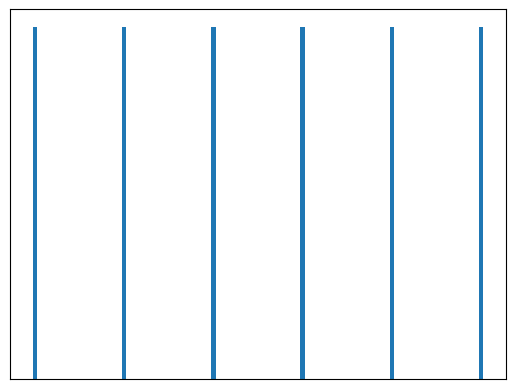

In [12]:
plt.hist(np.arange(1,7), bins = 6, rwidth=0.05)
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

#### Continuous Uniform Plots Visualized:

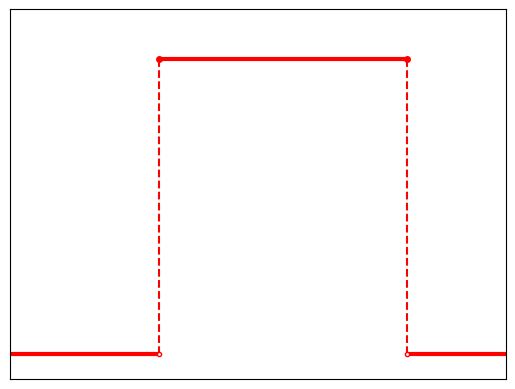

In [13]:
x = np.linspace(0,10,100)
y = np.full_like(x, fill_value=0)
y[30:80]=6
#plt.scatter(x, y, color="red")
plt.hlines(6,3,8, color="red", linewidth=3)
plt.hlines(0,0,3, color="red", linewidth=3)
plt.hlines(0,8,10, color="red", linewidth=3)
plt.vlines(3,0,6, color="red", linestyles="dashed")
plt.vlines(8,0,6, color="red", linestyles="dashed")
plt.plot(3, 0, marker="o", markeredgecolor="red", color='w', markersize=3)
plt.plot(8, 0, marker="o", markeredgecolor="red", color='w', markersize=3)
plt.plot(3, 6, marker="o", markeredgecolor="red", color='r', markersize=4)
plt.plot(8, 6, marker="o", markeredgecolor="red", color='r', markersize=4)
plt.xlim(0,10)
plt.ylim(-0.5,7)
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

### Normal Distribution

Formal definition:

\begin{equation}f(x) = \frac{e^{-x^{2}/2}} {\sqrt{2\pi}}\end{equation}

which is a special case of the generic formula:

\begin{equation}f(x) = \frac{e^{-(x - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}}, where \ \mu = 0 \ and \ \sigma = 1\end{equation}

Normal distribution is complex to describe with a formula, though often occurs in nature and everydays life.

#### Normal Distribution Plots Visualized:

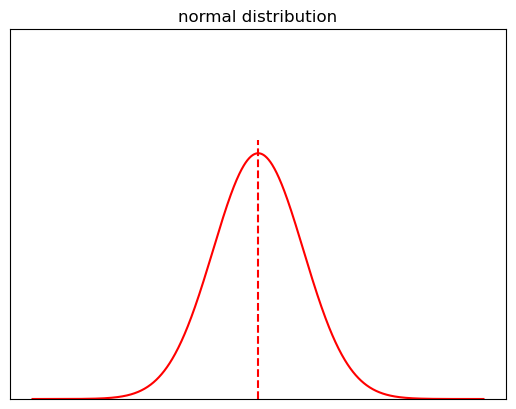

In [14]:
plt.figure(dpi=100)
x = np.arange(-5,5,.01)
y = np.exp((-x**2)/2)/np.sqrt(2*np.pi)
plt.plot(x,y, color="red")
plt.title('normal distribution')
plt.vlines(0,0,0.42, linestyles="--", color="red")
plt.ylim(0,0.6)
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

The normal distribution curve is
- symmetrical
     - mean, median and mode in the middle
- has a peak
- unimodal (only one peak)

        More than 2/3 falls between +/- 1 standard deviation: 68%
        The majority  falls between +/- 2 standard deviation: 95%
        Almost all    falls between +/- 3 standard deviation: 99.7%

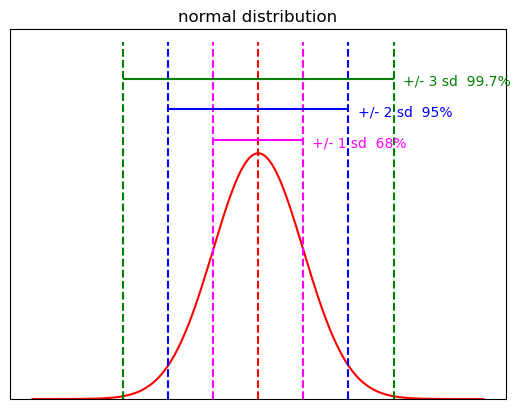

In [15]:
plt.figure(dpi=100)
x = np.arange(-5,5,.01)
y = np.exp((-x**2)/2)/np.sqrt(2*np.pi)
plt.plot(x,y, color="red")
plt.title('normal distribution')

plt.vlines(0,0,0.58, linestyles="--", color="red")
plt.vlines(-1,0,0.58, linestyles="--", color="magenta")
plt.vlines(1,0,0.58, linestyles="--", color="magenta")
plt.vlines(-2,0,0.58, linestyles="--", color="blue")
plt.vlines(2,0,0.58, linestyles="--", color="blue")
plt.vlines(-3,0,0.58, linestyles="--", color="green")
plt.vlines(3,0,0.58, linestyles="--", color="green")

plt.hlines(0.42,-1,1, color="magenta")
plt.hlines(0.47,-2,2, color="blue")
plt.hlines(0.52,-3,3, color="green")

plt.text(3.2,0.51, "+/- 3 sd  99.7%", color="green")
plt.text(2.2,0.46, "+/- 2 sd  95%", color="blue")
plt.text(1.2,0.41, "+/- 1 sd  68%", color="magenta")

plt.ylim(0,0.6)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

We can use NumPy's .randn() method:

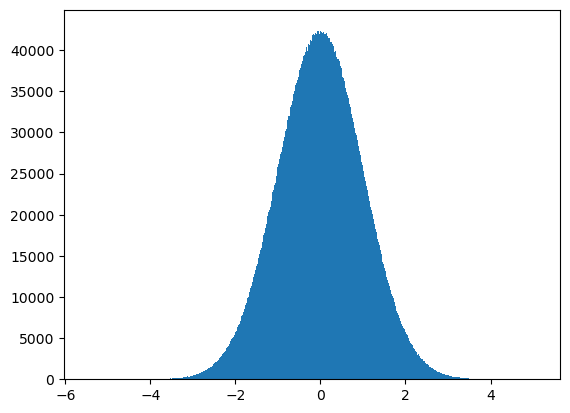

In [16]:
plt.figure(dpi=100)
x = np.random.randn(10**7)
plt.hist(x, bins=1000)
plt.show()

Normal "like" distributions:
- assymmetric: right skewed and left skewed (positive skew and negative skew)
    - positive skewness is more frequent
- multimodal: multiple peaks
- distorted: flat or high peaked, kurtosis

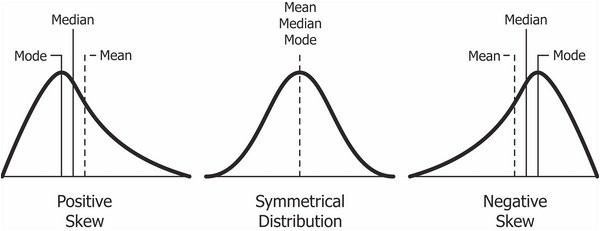

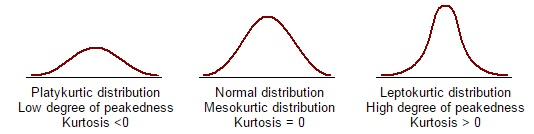

Lets do some experiment by rolling six dice and see the frequency of the rolled sums.
Observations:
- Rolling six dice the sum will be between 6 and 36
- Expectation is the least frequent sum is 6 and 36 when all dice show the same number: 1 or 6
- Expactation is the most freqent sum will be 21

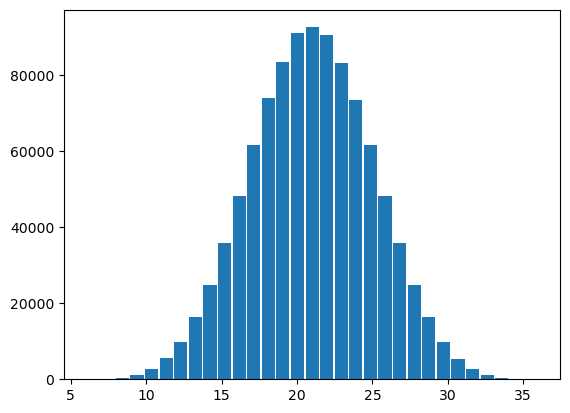

In [17]:
plt.hist(np.random.randint(1,7,10**6) + np.random.randint(1,7,10**6) + np.random.randint(1,7,10**6) + np.random.randint(1,7,10**6) + np.random.randint(1,7,10**6) + np.random.randint(1,7,10**6), bins=31, rwidth=0.9)
plt.show()

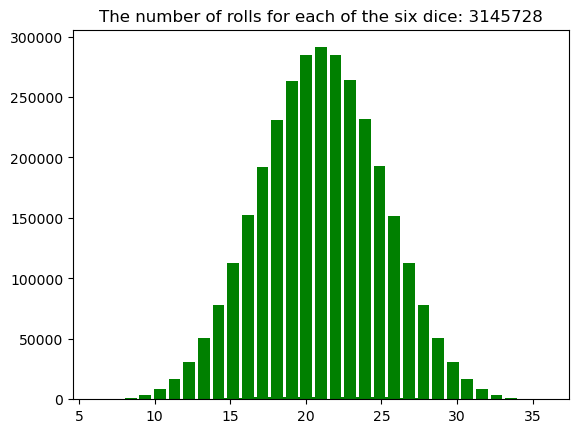

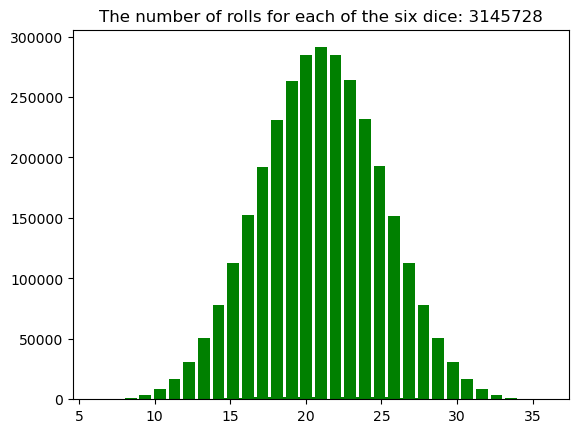

In [18]:
for i in range(20):
    nrolls = 6 * 2 ** i
    roll_1 = np.random.randint(1,7,nrolls)
    roll_2 = np.random.randint(1,7,nrolls)
    roll_3 = np.random.randint(1,7,nrolls)
    roll_4 = np.random.randint(1,7,nrolls)
    roll_5 = np.random.randint(1,7,nrolls)
    roll_6 = np.random.randint(1,7,nrolls)
    plt.hist(roll_1 + roll_2 + roll_3 + roll_4 + roll_5 + roll_6, bins = 31, rwidth=0.8, color="Green")
    plt.title("The number of rolls for each of the six dice: " + str(6 * 2 ** i))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1)
    

The plot resembles normal distribusion with no kurtosis and no skewedness.

Central Limit Theorem (CLT):
- the distribution of a sample variable approximates to normal distribution
  
  or


- the sampling distribution of a sample mean is approximately normal (assuming the sample size is large enough), even if the population distribution is not normal

In our case: the sum of multiple independent variables is approximately normal.

Assumptions made:
- identically distributed variables, finite mean and variance
- Regardless if the original independent variables are not normally distributed

There are various known distributions beside uniform and normal.

<a href="https://en.wikipedia.org/wiki/List_of_probability_distributions">List of probability distributions</a> (wikipedia)

#### Exercise 13.1:
Roll a fair icosahedron a million times
- Plot the frequency of the outcomes
- What distribution does the plot resemble?

In [19]:
# Exercise 13.1 code:



#### Exercise 13.2:
Roll four fair icosahedron a $1, 10, 100, .. 10^6$ times
- Plot the frequencies of the sum as outcomes
    - Extra: Display a series of plots in one figure
- What distribution does the plot resemble?
- Plot the frequencies when rolling three icosahedrons
    - Extra: Display a series of plots in one figure
- What distribution does the plot resemble?

In [20]:
# Exercise 13.2 code:



#### Exercise 13.3:
Roll each Platonic solids $1, 10, 100, .. 10^6$ times
- Plot the frequencies of the sum as outcomes
    - Extra: Display a series of plots in one figure
- What distribution does the plot resemble?

In [21]:
# Exercise 13.3 code:

